# Tony Chen Final Project

In [299]:
import pandas as pd 
import numpy as np 
import matplotlib
matplotlib.use('Agg')
%pylab inline
import matplotlib.pyplot as plt 
import weightedcalcs as wc 
import datetime as dt
import ffmpeg
import matplotlib.animation as animation


Populating the interactive namespace from numpy and matplotlib


# 1. Produce Yields Dataframe

In [300]:
three_month="/Users/apple/Desktop/DB Final/3-Month.CSV"
six_month="/Users/apple/Desktop/DB Final/6-Month.CSV"
one_year="/Users/apple/Desktop/DB Final/1-Year.CSV"
two_year="/Users/apple/Desktop/DB Final/2-Year.CSV"
five_year="/Users/apple/Desktop/DB Final/5-Year.CSV"
ten_year="/Users/apple/Desktop/DB Final/10-Year.CSV"
unem="/Users/apple/Desktop/DB Final/Unem.CSV"
ipi="/Users/apple/Desktop/DB Final/IPI.CSV"
dateref="/Users/apple/Desktop/DB Final/Dateref.CSV"

In [301]:
df3m=pd.read_csv(three_month)
df3m["DATE"]=pd.to_datetime(df3m["DATE"])

df6m=pd.read_csv(six_month)
df6m["DATE"]=pd.to_datetime(df6m["DATE"])

df1y=pd.read_csv(one_year)
df1y["DATE"]=pd.to_datetime(df1y["DATE"])

df2y=pd.read_csv(two_year)
df2y["DATE"]=pd.to_datetime(df2y["DATE"])

df5y=pd.read_csv(five_year)
df5y["DATE"]=pd.to_datetime(df5y["DATE"])

df10y=pd.read_csv(ten_year)
df10y["DATE"]=pd.to_datetime(df10y["DATE"])

dfun=pd.read_csv(unem)
dfun["DATE"]=pd.to_datetime(dfun["DATE"])

dfipi=pd.read_csv(ipi)
dfipi["DATE"]=pd.to_datetime(dfipi["DATE"])

dftimeref=pd.read_csv(dateref)

In [302]:
combo = pd.merge(df3m,df6m,on="DATE",how='left') 
combo = pd.merge(combo,df1y,on="DATE",how='left') 
combo = pd.merge(combo,df2y,on="DATE",how='left') 
combo = pd.merge(combo,df5y,on="DATE",how='left') 
combo = pd.merge(combo,df10y,on="DATE",how='left') 
# Merge all treasuries yields data 

In [303]:
combo.dtypes

DATE     datetime64[ns]
DTB3             object
DTB6             object
DGS1             object
DGS2             object
DGS5             object
DGS10            object
dtype: object

In [304]:
new_column=["Date","Three_Month","Six_Month","One_Year","Two_Year","Five_Year","Ten_Year"]

In [305]:
combo.columns=new_column
# Renaming Columns 

In [306]:
combo.set_index("Date",inplace=True)


In [307]:
columnlist=list(combo)
for i in columnlist:
    combo[i]=pd.to_numeric(combo[i],errors='coerce')
# Convert all numbers into float type 

In [308]:
combo=combo.dropna(axis=0)

In [309]:
combo

,Three_Month,Six_Month,One_Year,Two_Year,Five_Year,Ten_Year
Date,,,,,,
1976-06-01,5.55,5.90,6.70,7.26,7.71,7.94
1976-06-02,5.57,5.94,6.72,7.23,7.74,7.94
1976-06-03,5.52,5.92,6.73,7.22,7.75,7.92
1976-06-04,5.46,5.82,6.60,7.12,7.67,7.89
1976-06-07,5.45,5.77,6.51,7.09,7.64,7.88
1976-06-08,5.45,5.77,6.55,7.11,7.67,7.90
1976-06-09,5.44,5.74,6.53,7.08,7.66,7.90
1976-06-10,5.43,5.73,6.53,7.00,7.61,7.86
1976-06-11,5.42,5.72,6.49,7.03,7.58,7.86


In [310]:
combomon=pd.DataFrame([])
for i in columnlist:
    combomon[i]=combo[i].resample('m').mean()

#Create a new dataframe that has the monthly average yields for each treasury 

In [311]:
combomon
combomon2=combomon

# 2. Adding in unemployment data

The monthly unemployment rate measures the percentage of people looking for a job but could not obtain one. Unemploymnet rate usually rises as economic performances dissapoint and it usually falls when the economy is robust

In [312]:
combomonunem=combomon

In [313]:
dfun.set_index("DATE",inplace=True)

In [314]:
combomonunem.index=dfun.index

In [315]:
combomonunem["Unem"]=dfun["UNRATENSA"]

In [316]:
combomonunem

,Three_Month,Six_Month,One_Year,Two_Year,Five_Year,Ten_Year,Unem
DATE,,,,,,,
1976-06-01,5.407727,5.765455,6.520909,7.060000,7.606818,7.861364,8.0
1976-07-01,5.230000,5.527143,6.200476,6.850000,7.487619,7.831905,7.8
1976-08-01,5.142727,5.400909,6.002727,6.631364,7.306818,7.768636,7.6
1976-09-01,5.083333,5.304762,5.844286,6.416190,7.129524,7.594286,7.4
1976-10-01,4.918500,5.060500,5.496500,5.984000,6.752000,7.411000,7.2
1976-11-01,4.752632,4.878947,5.294211,5.810000,6.519474,7.291053,7.4
1976-12-01,4.346364,4.512273,4.893182,5.376818,6.104545,6.869091,7.4
1977-01-01,4.617619,4.826667,5.290952,5.899524,6.583333,7.213333,8.3
1977-02-01,4.665263,4.897368,5.467368,6.088421,6.830000,7.391053,8.5


In [317]:
combomonunem["ChangeUnem"]=combomonunem["Unem"].diff().fillna(0)
# A seperate column "ChangeUnem" is created to show the change in unemployment rate over month 

In [318]:
combomonunem

,Three_Month,Six_Month,One_Year,Two_Year,Five_Year,Ten_Year,Unem,ChangeUnem
DATE,,,,,,,,
1976-06-01,5.407727,5.765455,6.520909,7.060000,7.606818,7.861364,8.0,0.0
1976-07-01,5.230000,5.527143,6.200476,6.850000,7.487619,7.831905,7.8,-0.2
1976-08-01,5.142727,5.400909,6.002727,6.631364,7.306818,7.768636,7.6,-0.2
1976-09-01,5.083333,5.304762,5.844286,6.416190,7.129524,7.594286,7.4,-0.2
1976-10-01,4.918500,5.060500,5.496500,5.984000,6.752000,7.411000,7.2,-0.2
1976-11-01,4.752632,4.878947,5.294211,5.810000,6.519474,7.291053,7.4,0.2
1976-12-01,4.346364,4.512273,4.893182,5.376818,6.104545,6.869091,7.4,0.0
1977-01-01,4.617619,4.826667,5.290952,5.899524,6.583333,7.213333,8.3,0.9
1977-02-01,4.665263,4.897368,5.467368,6.088421,6.830000,7.391053,8.5,0.2


# 3. Add Industrial Production Index Data

The industrial production index (IPI) is a monthly economic indicator that measures output in the manufacturing, mining, electric and gas industries, with respect to a base year. Higher number signifies an increase in industrial output, thus more vigorous economic performances. 

In [319]:
combofinal=combomonunem
dfipi.set_index("DATE",inplace=True)

In [320]:
combofinal["IPI"]=dfipi["INDPRO"]

In [321]:
combofinal["ChangeIPI"]=combofinal["IPI"].diff().fillna(0)

In [322]:
combofinal["ChangeIPI"]=combofinal["ChangeIPI"]*(-1)
#To allign with the unemployment data, a negative number for ChangeIPI would actually signal more robust economic performance while a positive number signals downturn 

In [323]:
combofinal
# This dataframe contains all the processed data we need

,Three_Month,Six_Month,One_Year,Two_Year,Five_Year,Ten_Year,Unem,ChangeUnem,IPI,ChangeIPI
DATE,,,,,,,,,,
1976-06-01,5.407727,5.765455,6.520909,7.060000,7.606818,7.861364,8.0,0.0,45.1830,-0.0000
1976-07-01,5.230000,5.527143,6.200476,6.850000,7.487619,7.831905,7.8,-0.2,45.4535,-0.2705
1976-08-01,5.142727,5.400909,6.002727,6.631364,7.306818,7.768636,7.6,-0.2,45.7737,-0.3202
1976-09-01,5.083333,5.304762,5.844286,6.416190,7.129524,7.594286,7.4,-0.2,45.9031,-0.1294
1976-10-01,4.918500,5.060500,5.496500,5.984000,6.752000,7.411000,7.2,-0.2,45.9207,-0.0176
1976-11-01,4.752632,4.878947,5.294211,5.810000,6.519474,7.291053,7.4,0.2,46.5978,-0.6771
1976-12-01,4.346364,4.512273,4.893182,5.376818,6.104545,6.869091,7.4,0.0,47.0854,-0.4876
1977-01-01,4.617619,4.826667,5.290952,5.899524,6.583333,7.213333,8.3,0.9,46.8276,0.2578
1977-02-01,4.665263,4.897368,5.467368,6.088421,6.830000,7.391053,8.5,0.2,47.5417,-0.7141


# 4. Yield Curve Graphs

This graph shows the change in yields on treasury securities of a variety of maturities from 1976-2019

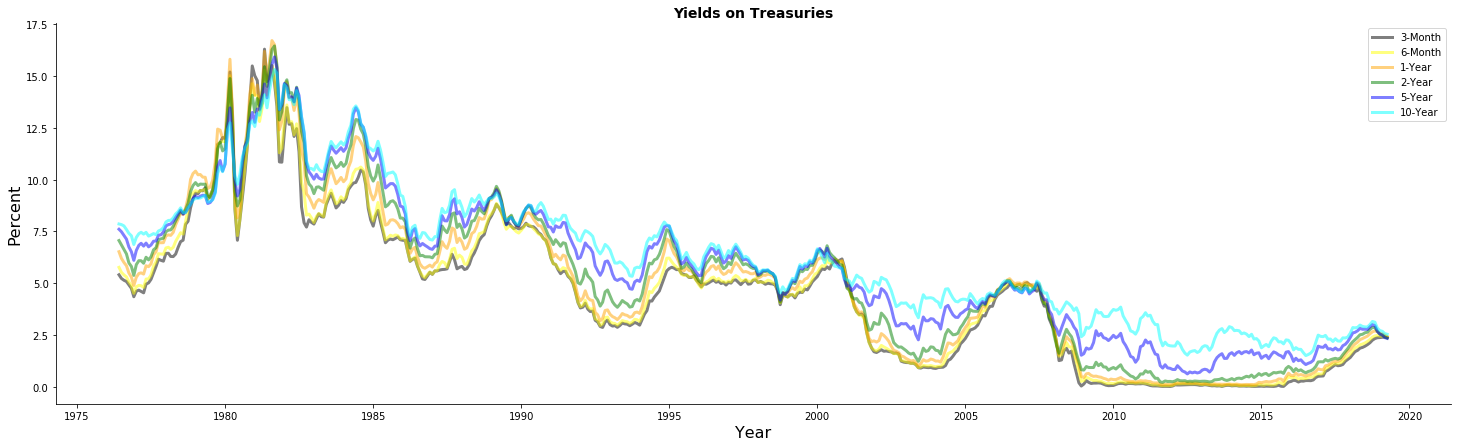

In [324]:
fig, ax = plt.subplots(figsize=(25,7))
ax.plot(combomonunem.index, combomonunem.Three_Month, color = "black", linewidth = 3,alpha=0.5,label="3-Month")
ax.plot(combomonunem.index, combomonunem.Six_Month, color = "yellow", linewidth = 3,alpha=0.5,label="6-Month")
ax.plot(combomonunem.index, combomonunem.One_Year, color = "orange", linewidth = 3,alpha=0.5,label="1-Year")
ax.plot(combomonunem.index, combomonunem.Two_Year, color = "green", linewidth = 3,alpha=0.5,label="2-Year")
ax.plot(combomonunem.index, combomonunem.Five_Year, color = "blue", linewidth = 3,alpha=0.5,label="5-Year")
ax.plot(combomonunem.index, combomonunem.Ten_Year, color = "cyan", linewidth = 3,alpha=0.5,label="10-Year")




ax.legend()

ax.set_title("Yields on Treasuries", fontsize = 14, fontweight = "bold")
ax.set_ylabel("Percent",fontsize=16)
ax.set_xlabel("Year",fontsize=16)

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

plt.savefig("Yield_Graph")

This graph selectively shows the change in yields on 3-month, 2-year and 10yr treasury securities, which will be the focus of this project. 

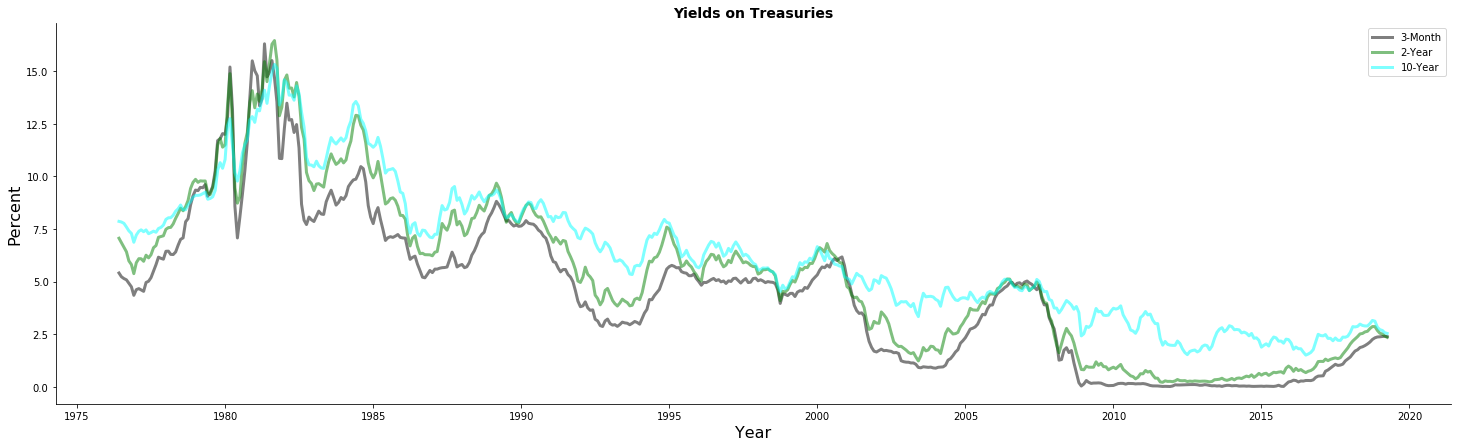

In [325]:
fig, ax = plt.subplots(figsize=(25,7))
ax.plot(combomonunem.index, combomonunem.Three_Month, color = "black", linewidth = 3,alpha=0.5,label="3-Month")
ax.plot(combomonunem.index, combomonunem.Two_Year, color = "green", linewidth = 3,alpha=0.5,label="2-Year")

ax.plot(combomonunem.index, combomonunem.Ten_Year, color = "cyan", linewidth = 3,alpha=0.5,label="10-Year")


ax.legend()

ax.set_title("Yields on Treasuries", fontsize = 14, fontweight = "bold")
ax.set_ylabel("Percent",fontsize=16)
ax.set_xlabel("Year",fontsize=16)

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

plt.savefig("Yield_Graph2")

# 5. Finding Where Inversion Happened 

We will create two extra columns to indicate when does yield curve inversion happen 

In [326]:
def f1(row):
    if row["Three_Month"]>row["Ten_Year"]:
        val = "Inverted"
    
    else:
        val = "Normal"
    return val
# This function will highlight when does 3-month yield surpasses 10-year yield

In [327]:
comboinvert=combofinal

In [328]:
comboinvert['Inversion1'] = comboinvert.apply(f1, axis=1)

In [329]:
def f2(row):
    if row["Three_Month"]>row["Two_Year"]:
        val = "Inverted"
    
    else:
        val = "Normal"
    return val
# This function will highlight when does 3-month yield surpasses 2-year yield

In [330]:
comboinvert['Inversion2'] = comboinvert.apply(f2, axis=1)

In [331]:
comboinvertfinal=comboinvert[["Inversion1","Inversion2"]]

In [332]:
comboinvertfinal
# A dataframe that shows when inversions happen 

,Inversion1,Inversion2
DATE,,
1976-06-01,Normal,Normal
1976-07-01,Normal,Normal
1976-08-01,Normal,Normal
1976-09-01,Normal,Normal
1976-10-01,Normal,Normal
1976-11-01,Normal,Normal
1976-12-01,Normal,Normal
1977-01-01,Normal,Normal
1977-02-01,Normal,Normal


In [333]:
comboinvertfinal.reset_index(inplace=True)
comboinvertfinal.set_index("Inversion1",inplace=True)
comboinvertfinal.loc["Inverted"]
# List of dates when 3m yields are higher than 10yr yields 

,DATE,Inversion2
Inversion1,,
Inverted,1978-12-01,Normal
Inverted,1979-01-01,Normal
Inverted,1979-02-01,Normal
Inverted,1979-03-01,Normal
Inverted,1979-04-01,Normal
Inverted,1979-05-01,Normal
Inverted,1979-06-01,Normal
Inverted,1979-07-01,Inverted
Inverted,1979-08-01,Inverted


In [334]:
comboinvertfinal.reset_index(inplace=True)
comboinvertfinal.set_index("Inversion2",inplace=True)
comboinvertfinal.loc["Inverted"]
# List of dates when 3m yields are higher than 2yr yields 

,Inversion1,DATE
Inversion2,,
Inverted,Inverted,1979-07-01
Inverted,Inverted,1979-08-01
Inverted,Inverted,1979-09-01
Inverted,Inverted,1979-10-01
Inverted,Inverted,1979-12-01
Inverted,Inverted,1980-01-01
Inverted,Inverted,1980-03-01
Inverted,Inverted,1980-04-01
Inverted,Inverted,1980-11-01


The above two table shows that historically, yield curve inversions happened during four different periods of time: 1980, 1990, 2001 and 2008. 

# 6. Plotting Yield Difference & Change in Economic Indicators

# 6A. When 3m > 2yr

The following graphs plot out the difference between 3-month yield and 2-year yield with changes in economic indicators. 

In [335]:
combofinal["ThrMon_TwoYear"]=combofinal['Three_Month']-combofinal["Two_Year"]
# This column represents the difference between 3-month yield and 2-yr yield 

In [336]:
combofinal["ThrMon_TenYear"]=combofinal['Three_Month']-combofinal["Ten_Year"]
# This column represents the difference between 3-month yield and 10-yr yield 

In [337]:
combofinal

,Three_Month,Six_Month,One_Year,Two_Year,Five_Year,Ten_Year,Unem,ChangeUnem,IPI,ChangeIPI,Inversion1,Inversion2,ThrMon_TwoYear,ThrMon_TenYear
DATE,,,,,,,,,,,,,,
1976-06-01,5.407727,5.765455,6.520909,7.060000,7.606818,7.861364,8.0,0.0,45.1830,-0.0000,Normal,Normal,-1.652273,-2.453636
1976-07-01,5.230000,5.527143,6.200476,6.850000,7.487619,7.831905,7.8,-0.2,45.4535,-0.2705,Normal,Normal,-1.620000,-2.601905
1976-08-01,5.142727,5.400909,6.002727,6.631364,7.306818,7.768636,7.6,-0.2,45.7737,-0.3202,Normal,Normal,-1.488636,-2.625909
1976-09-01,5.083333,5.304762,5.844286,6.416190,7.129524,7.594286,7.4,-0.2,45.9031,-0.1294,Normal,Normal,-1.332857,-2.510952
1976-10-01,4.918500,5.060500,5.496500,5.984000,6.752000,7.411000,7.2,-0.2,45.9207,-0.0176,Normal,Normal,-1.065500,-2.492500
1976-11-01,4.752632,4.878947,5.294211,5.810000,6.519474,7.291053,7.4,0.2,46.5978,-0.6771,Normal,Normal,-1.057368,-2.538421
1976-12-01,4.346364,4.512273,4.893182,5.376818,6.104545,6.869091,7.4,0.0,47.0854,-0.4876,Normal,Normal,-1.030455,-2.522727
1977-01-01,4.617619,4.826667,5.290952,5.899524,6.583333,7.213333,8.3,0.9,46.8276,0.2578,Normal,Normal,-1.281905,-2.595714
1977-02-01,4.665263,4.897368,5.467368,6.088421,6.830000,7.391053,8.5,0.2,47.5417,-0.7141,Normal,Normal,-1.423158,-2.725789


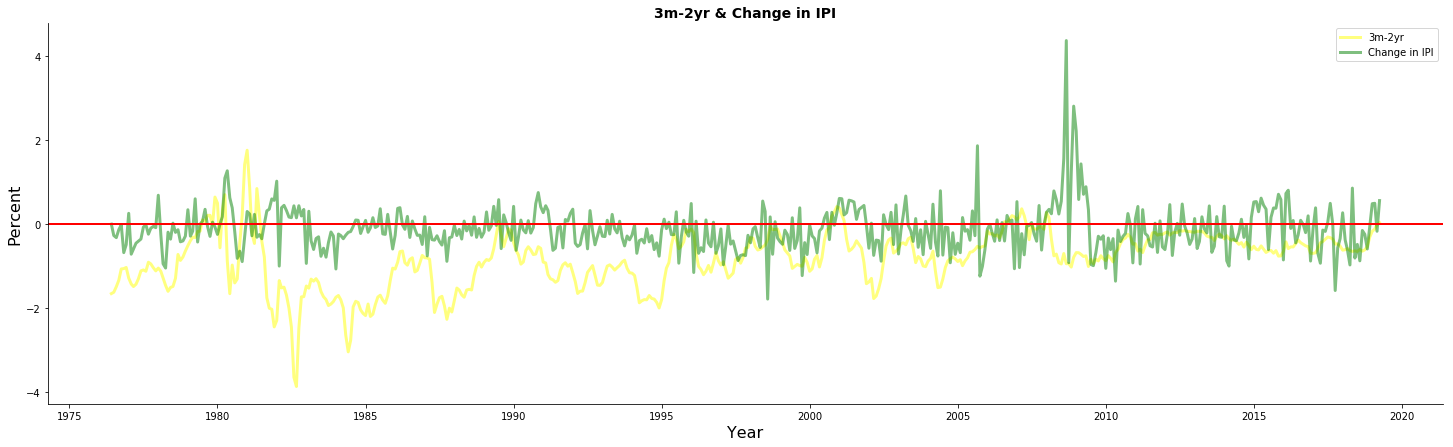

In [352]:
fig, ax = plt.subplots(figsize=(25,7))
ax.plot(combofinal.index, combofinal.ThrMon_TwoYear, color = "yellow", linewidth = 3,alpha=0.5,label="3m-2yr")
ax.plot(combofinal.index, combofinal.ChangeIPI, color = "green", linewidth = 3,alpha=0.5,label="Change in IPI")

axhline(linewidth=2, color='r')

ax.legend()

ax.set_title("3m-2yr & Change in IPI", fontsize = 14, fontweight = "bold")
ax.set_ylabel("Percent",fontsize=16)
ax.set_xlabel("Year",fontsize=16)




ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

plt.savefig("3_2_IPI")


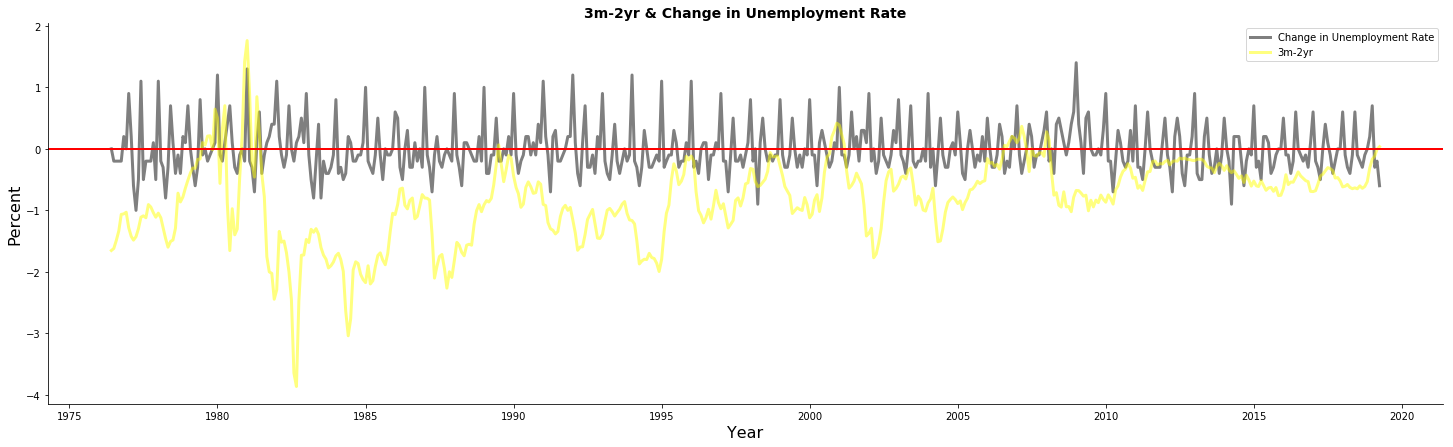

In [353]:
fig, ax = plt.subplots(figsize=(25,7))
ax.plot(combofinal.index, combofinal.ChangeUnem, color = "black", linewidth = 3,alpha=0.5,label="Change in Unemployment Rate")
ax.plot(combofinal.index, combofinal.ThrMon_TwoYear, color = "yellow", linewidth = 3,alpha=0.5,label="3m-2yr")

axhline(linewidth=2, color='r')

ax.legend()

ax.set_title("3m-2yr & Change in Unemployment Rate", fontsize = 14, fontweight = "bold")
ax.set_ylabel("Percent",fontsize=16)
ax.set_xlabel("Year",fontsize=16)

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

plt.savefig("3_2_ur")

When 3-month yield surpasses the 2-yr yield, economic indicators usually start to worsen within a short period of time. 

# 6B. When 3m>10yr 

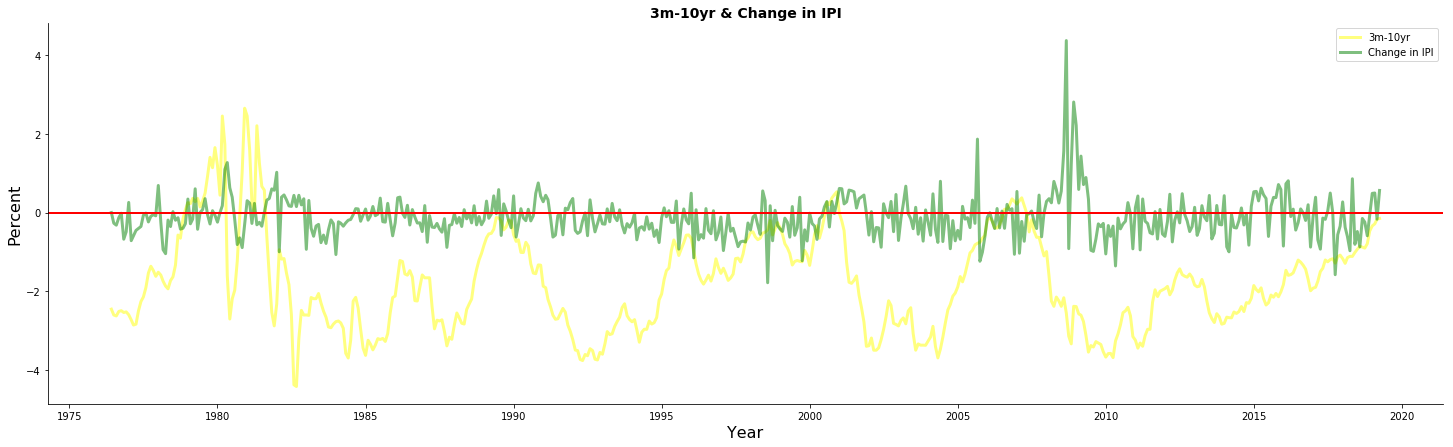

In [340]:
fig, ax = plt.subplots(figsize=(25,7))
ax.plot(combofinal.index, combofinal.ThrMon_TenYear, color = "yellow", linewidth = 3,alpha=0.5,label="3m-10yr")
ax.plot(combofinal.index, combofinal.ChangeIPI, color = "green", linewidth = 3,alpha=0.5,label="Change in IPI")

axhline(linewidth=2, color='r')

ax.legend()

ax.set_title("3m-10yr & Change in IPI", fontsize = 14, fontweight = "bold")
ax.set_ylabel("Percent",fontsize=16)
ax.set_xlabel("Year",fontsize=16)




ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

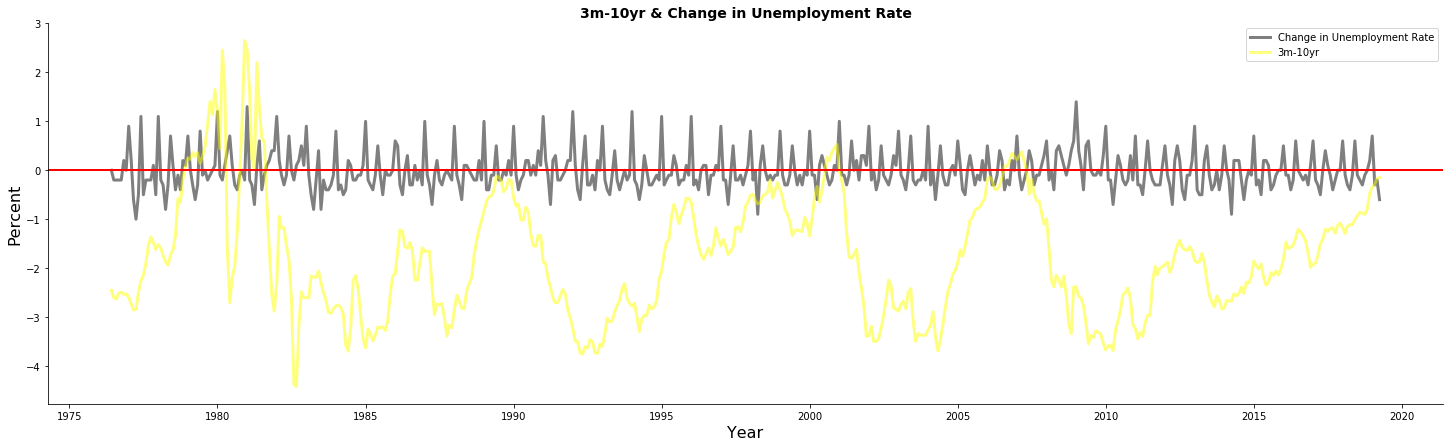

In [354]:
fig, ax = plt.subplots(figsize=(25,7))
ax.plot(combofinal.index, combofinal.ChangeUnem, color = "black", linewidth = 3,alpha=0.5,label="Change in Unemployment Rate")
ax.plot(combofinal.index, combofinal.ThrMon_TenYear, color = "yellow", linewidth = 3,alpha=0.5,label="3m-10yr")
#ax.plot(combofinal.index, combofinal.ChangeIPI, color = "green", linewidth = 3,alpha=0.5,label="Change in IPI")

axhline(linewidth=2, color='r')

ax.legend()

ax.set_title("3m-10yr & Change in Unemployment Rate", fontsize = 14, fontweight = "bold")
ax.set_ylabel("Percent",fontsize=16)
ax.set_xlabel("Year",fontsize=16)

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

plt.savefig("3_10_ur")

The difference between 3-month yield and 10-year yield also seems to be a good leading indicator for economic performances. 

# 7. Zooming in on Specific Period of Inversion

# A. 1980-1982

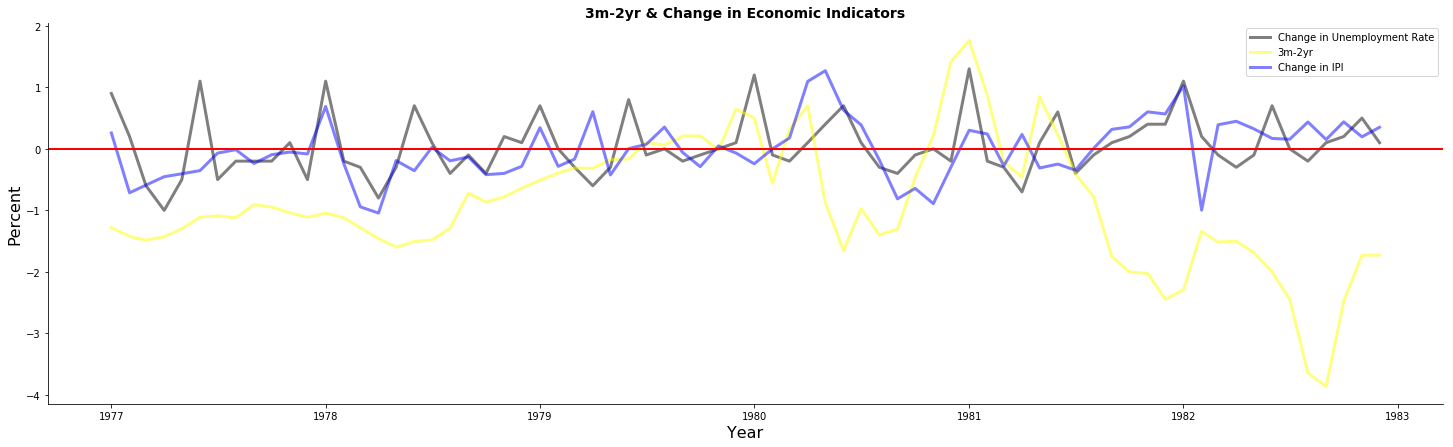

In [350]:
fig, ax = plt.subplots(figsize=(25,7))
ax.plot(combofinal["1977":"1982"].index, combofinal["1977":"1982"].ChangeUnem, color = "black", linewidth = 3,alpha=0.5,label="Change in Unemployment Rate")
ax.plot(combofinal["1977":"1982"].index, combofinal["1977":"1982"].ThrMon_TwoYear, color = "yellow", linewidth = 3,alpha=0.5,label="3m-2yr")
ax.plot(combofinal["1977":"1982"].index, combofinal["1977":"1982"].ChangeIPI, color = "blue", linewidth = 3,alpha=0.5,label="Change in IPI")


axhline(linewidth=2, color='r')

ax.legend()

ax.set_title("3m-2yr & Change in Economic Indicators", fontsize = 14, fontweight = "bold")
ax.set_ylabel("Percent",fontsize=16)
ax.set_xlabel("Year",fontsize=16)

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

plt.savefig("1980_3_10")

Inversion happened during mid 1979, and did not fully return to the norm until early 1981. Unemployment rate and IPI continued to worsen during that period.Please note that IPI has been multiplied by (-1) previously so that an increase in IPI acutally signifies poorer economic performance. 

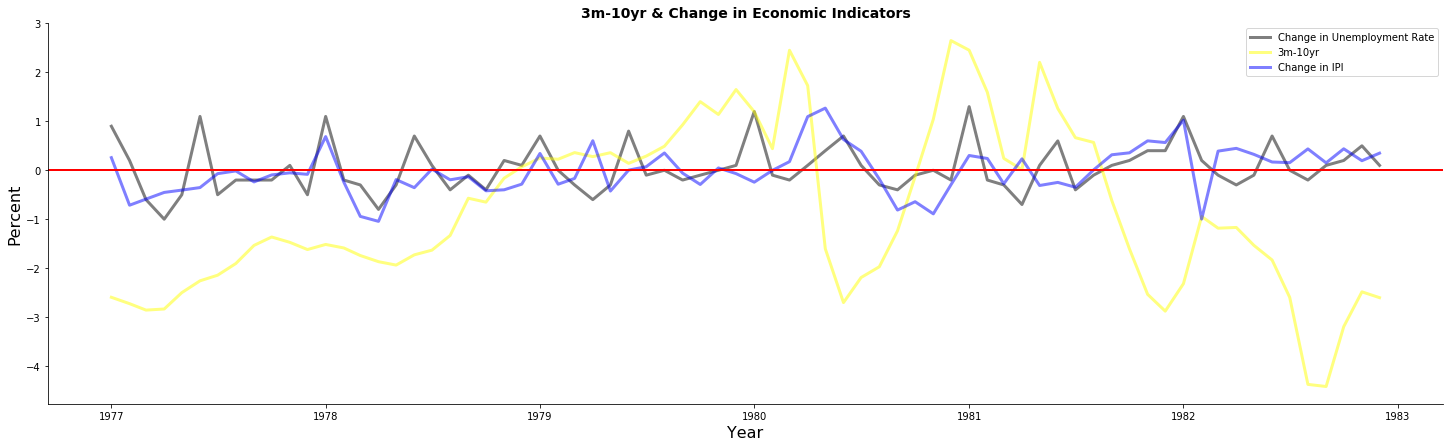

In [342]:
fig, ax = plt.subplots(figsize=(25,7))
ax.plot(combofinal["1977":"1982"].index, combofinal["1977":"1982"].ChangeUnem, color = "black", linewidth = 3,alpha=0.5,label="Change in Unemployment Rate")
ax.plot(combofinal["1977":"1982"].index, combofinal["1977":"1982"].ThrMon_TenYear, color = "yellow", linewidth = 3,alpha=0.5,label="3m-10yr")
ax.plot(combofinal["1977":"1982"].index, combofinal["1977":"1982"].ChangeIPI, color = "blue", linewidth = 3,alpha=0.5,label="Change in IPI")

#ax.plot(combofinal.index, combofinal.ChangeIPI, color = "green", linewidth = 3,alpha=0.5,label="Change in IPI")

axhline(linewidth=2, color='r')

ax.legend()

ax.set_title("3m-10yr & Change in Economic Indicators", fontsize = 14, fontweight = "bold")
ax.set_ylabel("Percent",fontsize=16)
ax.set_xlabel("Year",fontsize=16)

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

plt.savefig("1980_3_2")

Inversion happened at the end of 1978, and a period of higher unemployment rate and lower IPI soon followed. 

# B. 1990-1991

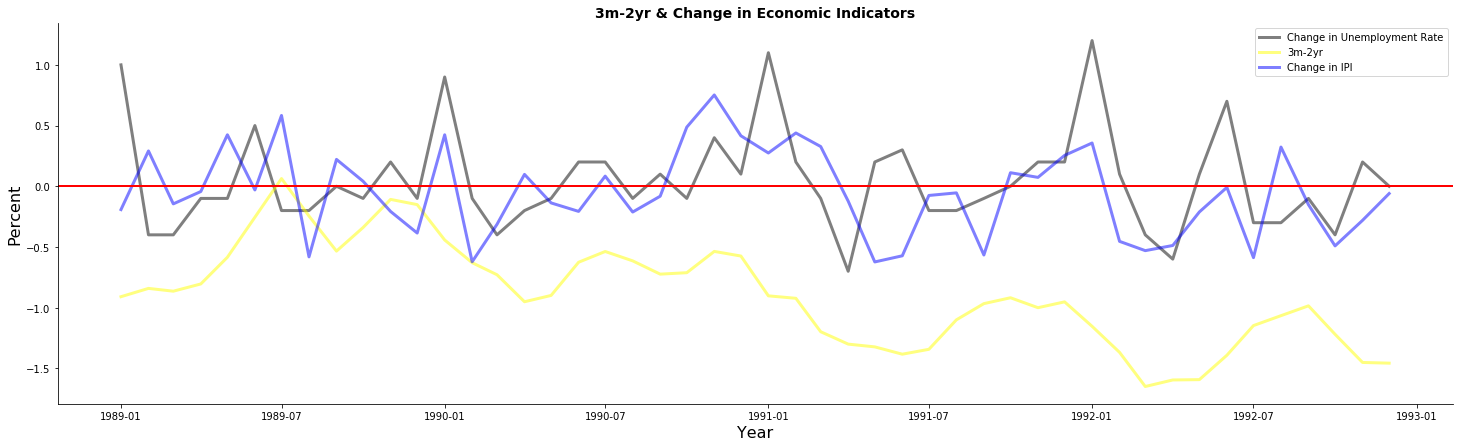

In [351]:
fig, ax = plt.subplots(figsize=(25,7))
ax.plot(combofinal["1989":"1992"].index, combofinal["1989":"1992"].ChangeUnem, color = "black", linewidth = 3,alpha=0.5,label="Change in Unemployment Rate")
ax.plot(combofinal["1989":"1992"].index, combofinal["1989":"1992"].ThrMon_TwoYear, color = "yellow", linewidth = 3,alpha=0.5,label="3m-2yr")
ax.plot(combofinal["1989":"1992"].index, combofinal["1989":"1992"].ChangeIPI, color = "blue", linewidth = 3,alpha=0.5,label="Change in IPI")


axhline(linewidth=2, color='r')

ax.legend()

ax.set_title("3m-2yr & Change in Economic Indicators", fontsize = 14, fontweight = "bold")
ax.set_ylabel("Percent",fontsize=16)
ax.set_xlabel("Year",fontsize=16)

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
plt.savefig("1990_3_2")

3m-2yr curve inverted around July 1989. Unemployment rate and IPI numbers worsened starting from Dec 1989. 

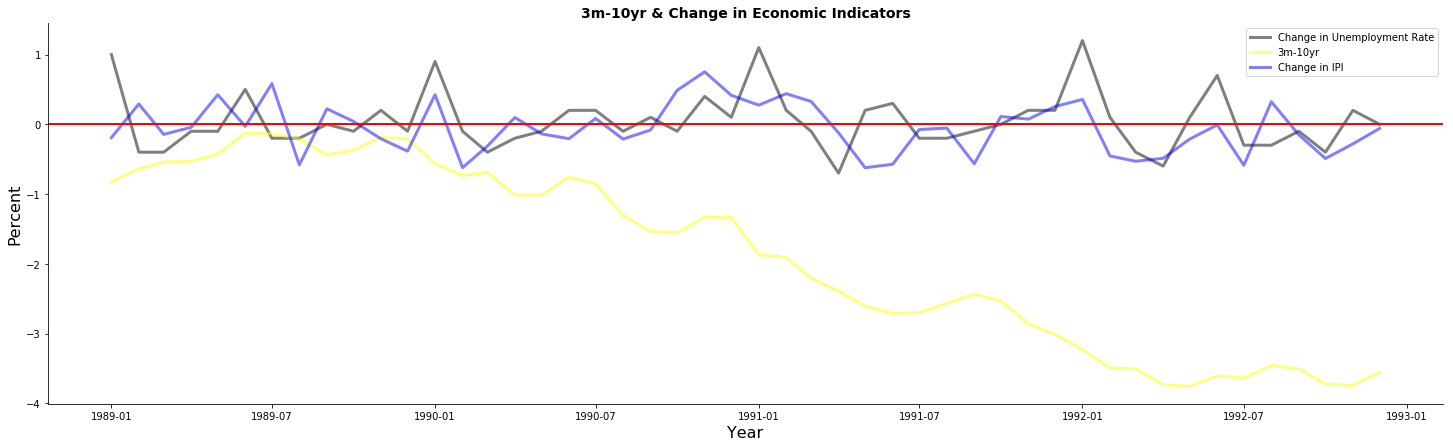

In [344]:
fig, ax = plt.subplots(figsize=(25,7))
ax.plot(combofinal["1989":"1992"].index, combofinal["1989":"1992"].ChangeUnem, color = "black", linewidth = 3,alpha=0.5,label="Change in Unemployment Rate")
ax.plot(combofinal["1989":"1992"].index, combofinal["1989":"1992"].ThrMon_TenYear, color = "yellow", linewidth = 3,alpha=0.5,label="3m-10yr")
ax.plot(combofinal["1989":"1992"].index, combofinal["1989":"1992"].ChangeIPI, color = "blue", linewidth = 3,alpha=0.5,label="Change in IPI")

#ax.plot(combofinal.index, combofinal.ChangeIPI, color = "green", linewidth = 3,alpha=0.5,label="Change in IPI")

axhline(linewidth=2, color='r')

ax.legend()

ax.set_title("3m-10yr & Change in Economic Indicators", fontsize = 14, fontweight = "bold")
ax.set_ylabel("Percent",fontsize=16)
ax.set_xlabel("Year",fontsize=16)

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

plt.savefig("1990_3_10")

Monthly 3m-10yr data never inverted, but unemployment rate started to hike as the yield spred tightened throughout 1989. 

# C. 2001

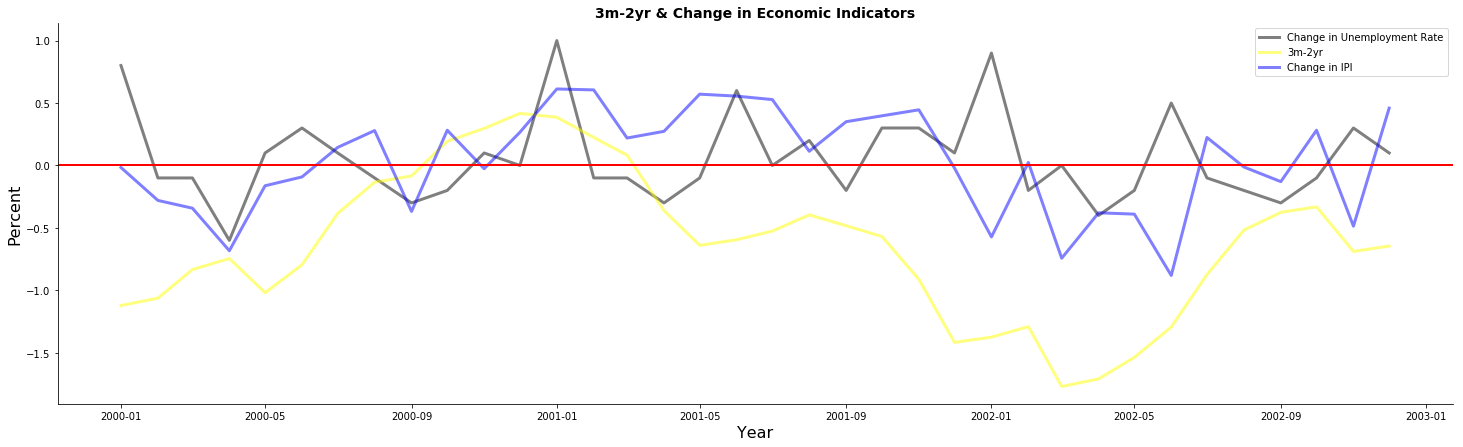

In [346]:
fig, ax = plt.subplots(figsize=(25,7))
ax.plot(combofinal["2000":"2002"].index, combofinal["2000":"2002"].ChangeUnem, color = "black", linewidth = 3,alpha=0.5,label="Change in Unemployment Rate")
ax.plot(combofinal["2000":"2002"].index, combofinal["2000":"2002"].ThrMon_TwoYear, color = "yellow", linewidth = 3,alpha=0.5,label="3m-2yr")
ax.plot(combofinal["2000":"2002"].index, combofinal["2000":"2002"].ChangeIPI, color = "blue", linewidth = 3,alpha=0.5,label="Change in IPI")

#ax.plot(combofinal.index, combofinal.ChangeIPI, color = "green", linewidth = 3,alpha=0.5,label="Change in IPI")

axhline(linewidth=2, color='r')

ax.legend()

ax.set_title("3m-2yr & Change in Economic Indicators", fontsize = 14, fontweight = "bold")
ax.set_ylabel("Percent",fontsize=16)
ax.set_xlabel("Year",fontsize=16)

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
plt.savefig("2001_3_2")

3m-2yr inverted around Sep 2000, and unemployemnt rate skyrocketed at the end of 2000. 

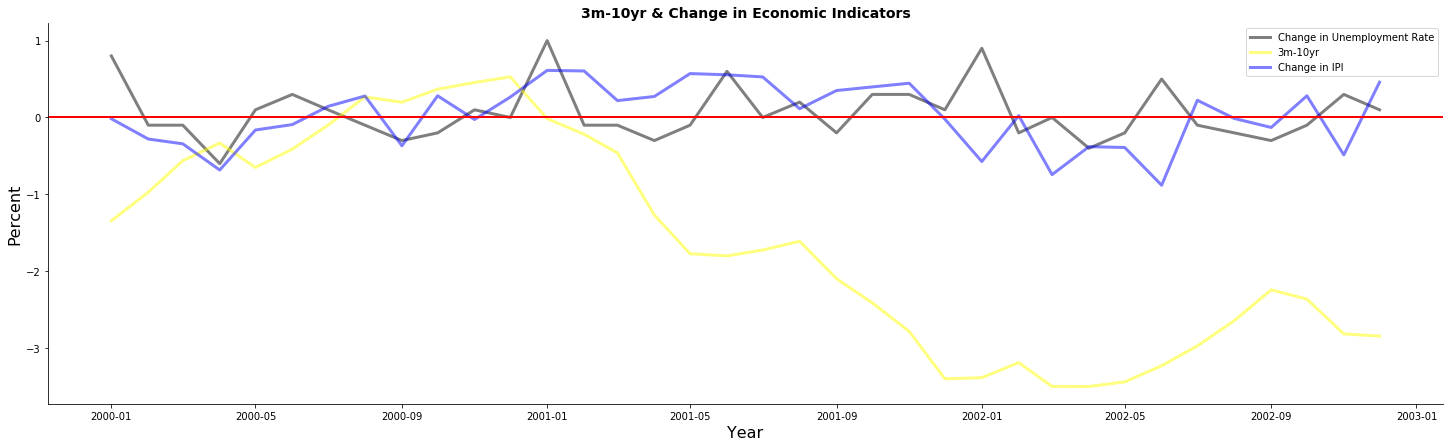

In [347]:
fig, ax = plt.subplots(figsize=(25,7))
ax.plot(combofinal["2000":"2002"].index, combofinal["2000":"2002"].ChangeUnem, color = "black", linewidth = 3,alpha=0.5,label="Change in Unemployment Rate")
ax.plot(combofinal["2000":"2002"].index, combofinal["2000":"2002"].ThrMon_TenYear, color = "yellow", linewidth = 3,alpha=0.5,label="3m-10yr")
ax.plot(combofinal["2000":"2002"].index, combofinal["2000":"2002"].ChangeIPI, color = "blue", linewidth = 3,alpha=0.5,label="Change in IPI")

#ax.plot(combofinal.index, combofinal.ChangeIPI, color = "green", linewidth = 3,alpha=0.5,label="Change in IPI")

axhline(linewidth=2, color='r')

ax.legend()

ax.set_title("3m-10yr & Change in Economic Indicators", fontsize = 14, fontweight = "bold")
ax.set_ylabel("Percent",fontsize=16)
ax.set_xlabel("Year",fontsize=16)

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
plt.savefig("2001_3_10")

3m-10yr inverted around July 2000, and a period of dissapointing unemployment and IPI numbers followed. 

# D. 2008-2009

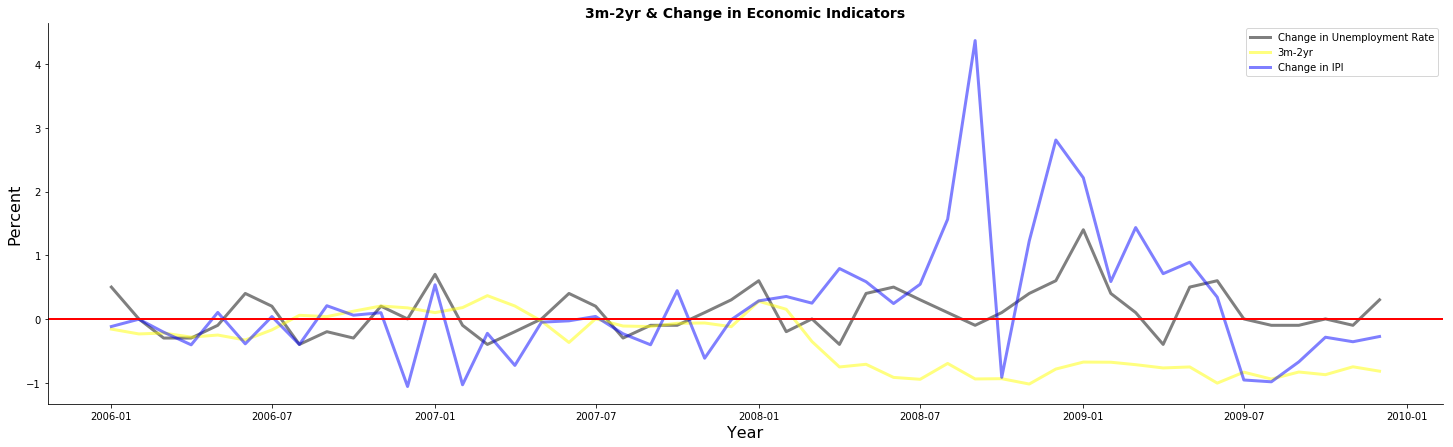

In [348]:
fig, ax = plt.subplots(figsize=(25,7))
ax.plot(combofinal["2006":"2009"].index, combofinal["2006":"2009"].ChangeUnem, color = "black", linewidth = 3,alpha=0.5,label="Change in Unemployment Rate")
ax.plot(combofinal["2006":"2009"].index, combofinal["2006":"2009"].ThrMon_TwoYear, color = "yellow", linewidth = 3,alpha=0.5,label="3m-2yr")
ax.plot(combofinal["2006":"2009"].index, combofinal["2006":"2009"].ChangeIPI, color = "blue", linewidth = 3,alpha=0.5,label="Change in IPI")

#ax.plot(combofinal.index, combofinal.ChangeIPI, color = "green", linewidth = 3,alpha=0.5,label="Change in IPI")

axhline(linewidth=2, color='r')

ax.legend()

ax.set_title("3m-2yr & Change in Economic Indicators", fontsize = 14, fontweight = "bold")
ax.set_ylabel("Percent",fontsize=16)
ax.set_xlabel("Year",fontsize=16)

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

plt.savefig("2008_3_2")

Inversion and near inversion persisted from July 2006 to Feb 2008, preceding the worst depression in decades. 

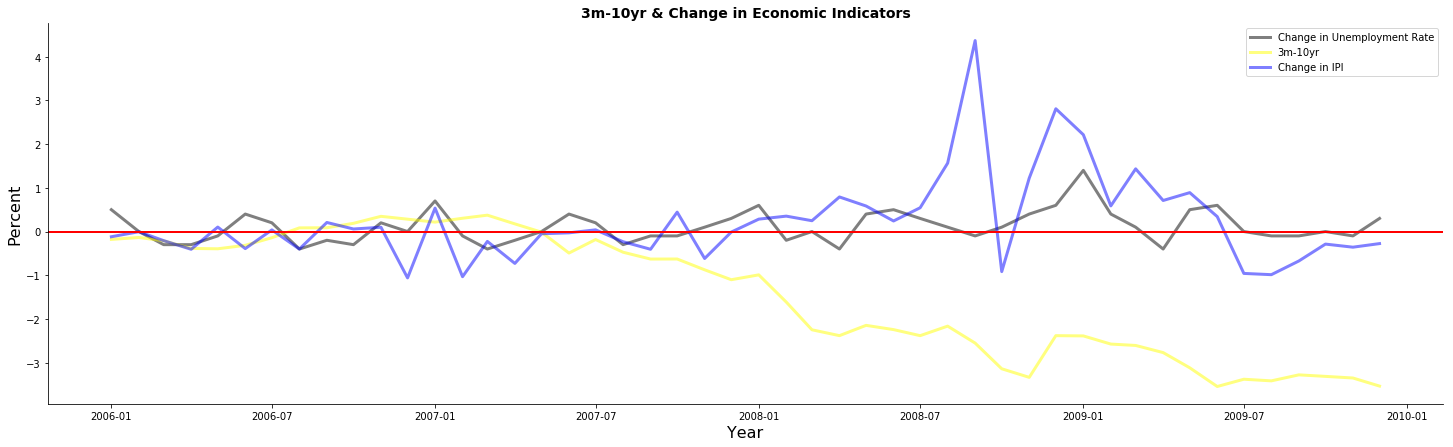

In [349]:
fig, ax = plt.subplots(figsize=(25,7))
ax.plot(combofinal["2006":"2009"].index, combofinal["2006":"2009"].ChangeUnem, color = "black", linewidth = 3,alpha=0.5,label="Change in Unemployment Rate")
ax.plot(combofinal["2006":"2009"].index, combofinal["2006":"2009"].ThrMon_TenYear, color = "yellow", linewidth = 3,alpha=0.5,label="3m-10yr")
ax.plot(combofinal["2006":"2009"].index, combofinal["2006":"2009"].ChangeIPI, color = "blue", linewidth = 3,alpha=0.5,label="Change in IPI")

#ax.plot(combofinal.index, combofinal.ChangeIPI, color = "green", linewidth = 3,alpha=0.5,label="Change in IPI")

axhline(linewidth=2, color='r')

ax.legend()

ax.set_title("3m-10yr & Change in Economic Indicators", fontsize = 14, fontweight = "bold")
ax.set_ylabel("Percent",fontsize=16)
ax.set_xlabel("Year",fontsize=16)

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
plt.savefig("2008_3_10")

Inversion persisted from July 2006 to May 2007, preceding the worst depression in decades. 

# Conclusion

After examining multiple periods when yield inversion took place, including 1980, 1990, 2001 and 2008, it could be concluded that there is indeed a correlation between yield curve inversion and economic downturn. Below are some observations extracted from the analysis:
1. 3m-2yr and 3m-10yr curves do not always invert at the same time. 3m-2yr curve inverted around July 1989, but 3m-10yr curve did not invert. 
2. Although both seem to be reliable preceding indicators, for the same period, the inversion of 3m-10yr curve usually precedes the inversion of 3m-2yr curve, as seen during 1980, 2001 and 2008. 
3. Another limit is that we are discussing based on the monthly yield data. It is possible that yield curve inversion happened for a few days within the month, but we are unable to capture that because our analysis is based on the monthly yield data, which is the mean of daily yield data. 


# Yield Curve Animation

In [51]:
combomon2.reset_index(inplace=True)

In [52]:
combomon2["Date"]=dftimeref["Date"]

In [53]:
combomon2.set_index("Date",inplace=True)

In [54]:
combomon2.index[2]

'8/1/76'

In [55]:
llist=[0,1,2,3,4,5]

In [56]:
combomon2

,Three_Month,Six_Month,One_Year,Two_Year,Five_Year,Ten_Year
Date,,,,,,
6/1/76,5.407727,5.765455,6.520909,7.060000,7.606818,7.861364
7/1/76,5.230000,5.527143,6.200476,6.850000,7.487619,7.831905
8/1/76,5.142727,5.400909,6.002727,6.631364,7.306818,7.768636
9/1/76,5.083333,5.304762,5.844286,6.416190,7.129524,7.594286
10/1/76,4.918500,5.060500,5.496500,5.984000,6.752000,7.411000
11/1/76,4.752632,4.878947,5.294211,5.810000,6.519474,7.291053
12/1/76,4.346364,4.512273,4.893182,5.376818,6.104545,6.869091
1/1/77,4.617619,4.826667,5.290952,5.899524,6.583333,7.213333
2/1/77,4.665263,4.897368,5.467368,6.088421,6.830000,7.391053


In [57]:
combomon2.columns=llist

In [58]:
combomon2.iloc[2].min()

5.142727272727272

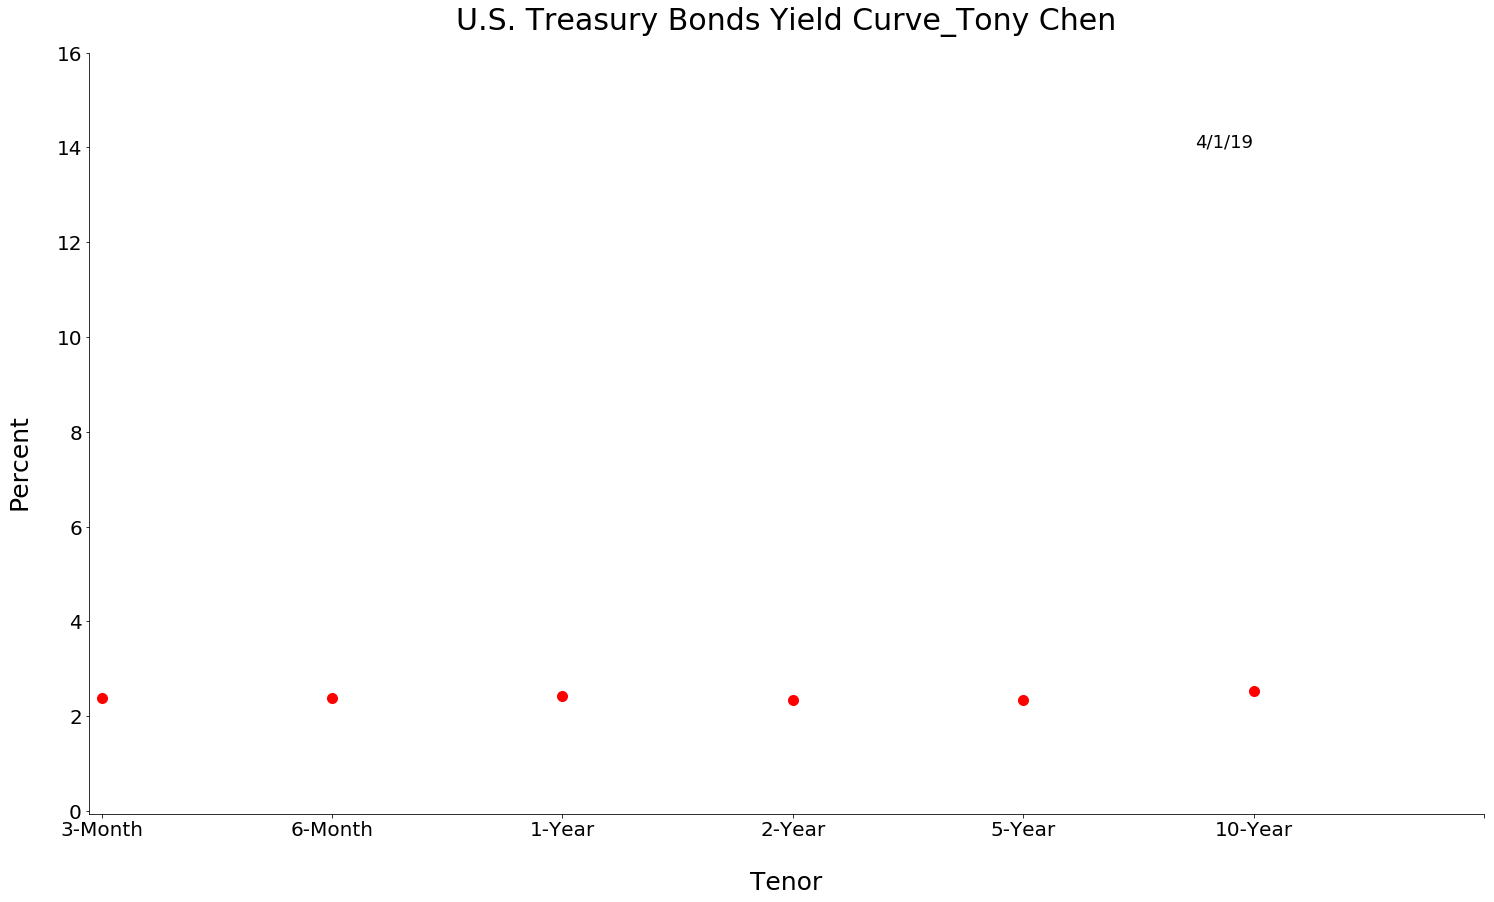

In [162]:
start_date = '1976-06-01'

end_date = '2019-03-29'


fig = plt.figure(figsize=(25,14))
ax = fig.add_subplot(1, 1, 1)
line, = ax.plot([], [], lw=4) # for line

line2, = ax.plot([], [], 'o',ms=10,c="r")  # for point
line3, = ax.plot([], [], 'o',ms=10,c="r")  # for point
line4, = ax.plot([], [], 'o',ms=10,c="r")  # for point
line5, = ax.plot([], [], 'o',ms=10,c="r")  # for point
line6, = ax.plot([], [], 'o',ms=10,c="r")  # for point
line7, = ax.plot([], [], 'o',ms=10,c="r")  # for point



ax.grid()
ax.set_xticks(range(7))
ax.set_yticks([0,2,4,6,8,10,12,14,16])
xlabels = ["3-Month",'6-Month','1-Year','2-Year','5-Year','10-Year']
ylabels = [0,2,4,6,8,10,12,14,16]

ax.set_xticklabels(xlabels,fontsize=20)
ax.set_yticklabels(ylabels,fontsize=20)

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.grid(False)


figure_title = 'U.S. Treasury Bonds Yield Curve_Tony Chen'
figure_xlabel = 'Tenor'
figure_ylabel = 'Percent'

plt.text(0.5, 1.03, figure_title,horizontalalignment='center',fontsize=30,transform = ax.transAxes)
plt.text(0.5, -.1, figure_xlabel,horizontalalignment='center',fontsize=25,transform = ax.transAxes)
plt.text(-0.05, .5, figure_ylabel,horizontalalignment='center',fontsize=25,rotation='vertical',transform = ax.transAxes)

N = len(combomon2.index)


dateText = ax.text(5, 14, '',fontsize=18,horizontalalignment='right')



def init():
    line.set_data([], [])
    return line,

def animate(i):
    x=[0,1,2,3,4,5]
    y=list(combomon2.iloc[i])
    line.set_data(x, y)
    line2.set_data(0,combomon2.iloc[i][0])
    line3.set_data(1,combomon2.iloc[i][1])
    line4.set_data(2,combomon2.iloc[i][2])
    line5.set_data(3,combomon2.iloc[i][3])
    line6.set_data(4,combomon2.iloc[i][4])
    line7.set_data(5,combomon2.iloc[i][5])
    
    dateText.set_text(combomon2.index[i])

    return line,line2,line3, line4, line5, line6, line7, dateText

Writer = animation.writers['ffmpeg']
writer = Writer(fps=10, metadata=dict(artist='Brian C Jenkins'), bitrate=1800)

anim = animation.FuncAnimation(fig, animate, init_func=init,frames=N, interval=200)

anim.save("Yield_animation2"+'.mp4', writer = writer)

# Video is exported as mp4 and attached in PPT 
